# Final Project - Applied Data Science Capstone

Analysis between Nashville and Knoxville TN to determine the best location to operate a food truck.

In [112]:
#Import any and all libraries needed for this analysis.

import numpy as np 
import pandas as pd 

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json 

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library

import re # regular expressions
import matplotlib.pyplot as plt # basic plotting

print('Libraries imported.')

Libraries imported.


# Data Acqusition

Our first step will be to grab the data and prepare it for analysis.

### Weather data sources:
Nashville: https://en.wikipedia.org/wiki/Nashville,_Tennessee <br>
Knoxville: https://en.wikipedia.org/wiki/Knoxville,_Tennessee

### COVID data sources:
Tennessee: https://www.tn.gov/health/cedep/ncov/covid-19-vaccine-information.html <br>

<b>Update (3/13/21):</b> I decided to use two new datasets.  One is the Vaccine by County summary and the other is the daily case info.  These datasets seemed to be a better source than my original assessment using Microsoft COVID data.


## Weather data

In [70]:
# Scraping data from wikipedia for Nashville and Knoxville
url_nash = "https://en.wikipedia.org/wiki/Nashville,_Tennessee"
url_knox = "https://en.wikipedia.org/wiki/Knoxville,_Tennessee"

nash_wiki = pd.read_html(url_nash)
knox_wiki = pd.read_html(url_knox)

In [71]:
# Extracting the table that contains the weather data
nash_weather = nash_wiki[1]
knox_weather = knox_wiki[2]

### Nashville weather data

In [73]:
nash_weather

.mw-parser-output .navbar{display:inline;font-size:88%;font-weight:normal}.mw-parser-output .navbar-collapse{float:left;text-align:left}.mw-parser-output .navbar-boxtext{word-spacing:0}.mw-parser-output .navbar ul{display:inline-block;white-space:nowrap;line-height:inherit}.mw-parser-output .navbar-brackets::before{margin-right:-0.125em;content:"[ "}.mw-parser-output .navbar-brackets::after{margin-left:-0.125em;content:" ]"}.mw-parser-output .navbar li{word-spacing:-0.125em}.mw-parser-output .navbar-mini abbr{font-variant:small-caps;border-bottom:none;text-decoration:none;cursor:inherit}.mw-parser-output .navbar-ct-full{font-size:114%;margin:0 7em}.mw-parser-output .navbar-ct-mini{font-size:114%;margin:0 4em}.mw-parser-output .infobox .navbar{font-size:100%}.mw-parser-output .navbox .navbar{display:block;font-size:100%}.mw-parser-output .navbox-title .navbar{float:left;text-align:left;margin-right:0.5em}vteClimate data for Nashville (Nashville Int'l), 1981–2010 normals,[b] extremes 1871−present[c]  \
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  Month   
0                                 Record high °F (°C)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     
1                                Mean maximum °F (°C)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

### Knoxville weather data 

In [74]:
knox_weather

Climate data for Knoxville (McGhee Tyson Airport), 1981−2010 normals,[c] extremes 1871–present[d]  \
                                                                                               Month   
0                                 Record high °F (°C)                                                  
1                                Mean maximum °F (°C)                                                  
2                                Average high °F (°C)                                                  
3                                 Average low °F (°C)                                                  
4                                Mean minimum °F (°C)                                                  
5                                  Record low °F (°C)                                                  
6                   Average precipitation inches (mm)                                                  
7                        Average snowfall inches (cm)                                                  
8              Average precipitation days (≥ 0.01 in)                                                  
9                       Average snowy days (≥ 0.1 in)                                                  
10                      Average relative humidity (%)                                                  
11                        Mean monthly sunshine hours                                                  
12                          Percent possible sunshine                                                  
13  Source: NOAA (relative humidity and sun 1961–1...                                                  

                                                       \
                                                  Jan   
0                                          77.0(25.0)   
1                                          67.2(19.6)   
2                                           47.3(8.5)   
3                                          29.2(−1.6)   
4                                          9.6(−12.4)   
5                                            −24(−31)   
6                                           4.32(110)   
7                                            2.7(6.9)   
8                                                11.2   
9                                                 1.5   
10                                               71.7   
11                                              135.8   
12                                                 44   
13  Source: NOAA (relative humidity and sun 1961–1...   

                                                       \
                                                  Feb   
0                                          83.0(28.3)   
1                                          71.3(21.8)   
2                                          52.3(11.3)   
3                                           32.4(0.2)   
4                                          14.2(−9.9)   
5                                            −10(−23)   
6                                           4.26(108)   
7                                            1.6(4.1)   
8                                                11.0   
9                                                 1.2   
10                                               68.0   
11                                              145.3   
12                                                 48   
13  Source: NOAA (relative humidity and sun 1961–1...   

                                                       \
                                                  Mar   
0                                          88.0(31.1)   
1                                          79.1(26.2)   
2                                          61.4(16.3)   
3                                           39.2(4.0)   
4                                          22.2(−5.4)   
5                                          1.0(−17.2)   
6                                           4.34(110)   

# Analysis based on weather data
<b>Findings:</b>
There is not a lot of difference in the weather between Nashville and Knoxville.  Knoxville appears to get a little more rain in the summers months which might discourage visitors to my food truck.  Nashville is a little warmer, which might drive more people towards purchasing a frozen treat. <br>
Recommendation based on weather would be <u>Nashville</u>.

## COVID Data 

In [76]:
# Downloaded these two excel spreadsheet from https://www.tn.gov/health/cedep/ncov/covid-19-vaccine-information.html
VaccineSource = "COVID_VACCINE_COUNTY_SUMMARY.XLSX"
DailyCountCOVID = "Public-Dataset-County-New.xlsx"

In [79]:
# This dataset shows the number of people in TN getting vaccinated each day.
Vaccine = pd.read_excel(VaccineSource)
Vaccine.head(1)

,DATE,COUNTY,VACCINE_COUNT,NEW_VACCINE_COUNT,RECIPIENT_COUNT,NEW_RECIPIENT_COUNT,RECIP_FULLY_VACC,NEW_RECIP_FULLY_VACC
0,2020-12-17,BLOUNT,5,0,NaN,NaN,NaN,NaN


In [80]:
# This dataset shows the number of people catching COVID each day.
COVID = pd.read_excel(DailyCountCOVID)
COVID.head(1)

,DATE,COUNTY,TOTAL_CASES,NEW_CASES,TOTAL_CONFIRMED,NEW_CONFIRMED,TOTAL_PROBABLE,NEW_PROBABLE,POS_TESTS,NEW_POS_TESTS,NEG_TESTS,NEW_NEG_TESTS,TOTAL_TESTS,NEW_TESTS,NEW_DEATHS,TOTAL_DEATHS,NEW_RECOVERED,TOTAL_RECOVERED,NEW_ACTIVE,TOTAL_ACTIVE,NEW_INACTIVE_RECOVERED,TOTAL_INACTIVE_RECOVERED,NEW_HOSPITALIZED,TOTAL_HOSPITALIZED,TOTAL_DEATHS_BY_DOD
0,2020-03-05,Shelby,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


### This chart displays the number of people getting vaccinated in Nashville TN each day.

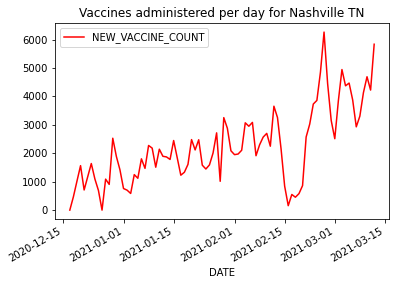

In [82]:
Vaccine.query('COUNTY == "DAVIDSON"').plot(kind = 'line', 
        x = 'DATE', 
        y = 'NEW_VACCINE_COUNT', 
        color = 'red')

# set the title 
plt.title('Vaccines administered per day for Nashville TN') 
  
# show the plot 
plt.show() 

### This chart displays the number of people contracting COVID in Nashville TN each day.

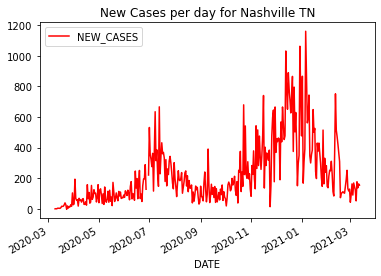

In [84]:
COVID.query('COUNTY == "Davidson"').plot(kind = 'line', 
        x = 'DATE', 
        y = 'NEW_CASES', 
        color = 'red')

# set the title 
plt.title('New Cases per day for Nashville TN') 
  
# show the plot 
plt.show() 

### This chart displays the number of people getting vaccinated in Knoxville TN each day.

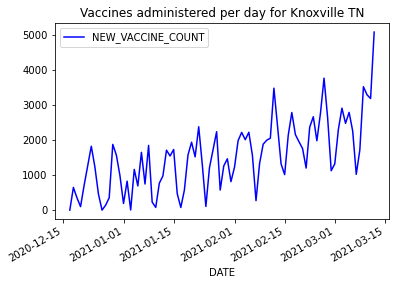

In [86]:
Vaccine.query('COUNTY == "KNOX"').plot(kind = 'line', 
        x = 'DATE', 
        y = 'NEW_VACCINE_COUNT', 
        color = 'blue')

# set the title 
plt.title('Vaccines administered per day for Knoxville TN') 
  
# show the plot 
plt.show() 

### This chart displays the number of people contracting COVID in Knoxville TN each day.

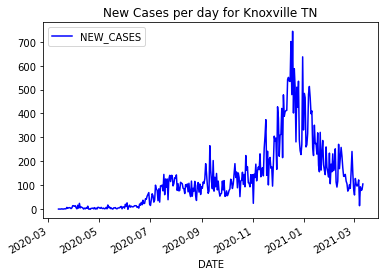

In [87]:
COVID.query('COUNTY == "Knox"').plot(kind = 'line', 
        x = 'DATE', 
        y = 'NEW_CASES', 
        color = 'blue')

# set the title 
plt.title('New Cases per day for Knoxville TN') 
  
# show the plot 
plt.show() 

# Analysis based on COVID data
<b>Findings:</b>
Vaccinations seem to be about equal between the two locations trending towards over 5000 per day.  In regards to new COVID cases both cities are trending down. However, daily new cases seem to be significantly less in Knoxville at less than 100 per day.<br>
Recommendation based on COVID data would be <u>Knoxville</u>.

## Venue data - Four Square

### Nashville Venue

In [2]:
# Pulling in lat long data for Neighborhoods in Nashville TN
NashData = "Nashville_LatLong.xlsx"
NashNeighborhoods = pd.read_excel(NashData)

NashNeighborhoods.head()

,Nash_Neighborhood,Nash_Neighborhood_Lat,Nash_Neighborhood_Long
0,Antioch,36.0597,-86.6716
1,Belle Meade,36.0959,-86.8569
2,Bellevue,36.0796,-86.9536
3,Bordeaux,36.1939,-86.8314
4,Donelson,36.1699,-86.6744


In [3]:
# Fetching the lat long for Nashville TN.
address = 'Nashville, TN'

geolocator = Nominatim(user_agent="tor_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Nashville are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Nashville are 36.1622296, -86.7743531.


In [4]:
# create map of Nashville using latitude and longitude values
map_nashville = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, Neighborhood in zip(NashNeighborhoods['Nash_Neighborhood_Lat'], NashNeighborhoods['Nash_Neighborhood_Long'], NashNeighborhoods['Nash_Neighborhood']):
    label = '{}'.format(Neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_nashville)  
    
map_nashville

In [6]:
NashNeighborhoods.loc[0, 'Nash_Neighborhood']

'Antioch'

In [7]:
neighborhood_latitude = NashNeighborhoods.loc[0, 'Nash_Neighborhood_Lat'] # neighborhood latitude value
neighborhood_longitude = NashNeighborhoods.loc[0, 'Nash_Neighborhood_Long'] # neighborhood longitude value
neighborhood_name = NashNeighborhoods.loc[0, 'Nash_Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Antioch are 36.0597, -86.6716.


In [8]:
radius = 500
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)

In [9]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '6051476ac0470e3e31f6fa14'},
 'response': {'headerLocation': 'Nashville',
  'headerFullLocation': 'Nashville',
  'headerLocationGranularity': 'city',
  'totalResults': 8,
  'suggestedBounds': {'ne': {'lat': 36.0642000045, 'lng': -86.66604386483796},
   'sw': {'lat': 36.0551999955, 'lng': -86.67715613516204}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4c966d3b82b56dcb947ce1aa',
       'name': 'Mill Creek Greenway Trail',
       'location': {'address': '5023 Blue Hole Rd',
        'lat': 36.05636934879779,
        'lng': -86.67299890248778,
        'labeledLatLngs': [{'label': 'display',
          'lat': 36.05636934879779,
          'lng': -86.67299890248778}],
        'distance': 391,
        'postalCode': '37013',
        'cc': '

In [10]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [11]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = pd.json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Mill Creek Greenway Trail,Trail,36.056369,-86.672999
1,AT&T,Mobile Phone Shop,36.056950,-86.667530
2,Sally's Famous Kitchen,Comfort Food Restaurant,36.059914,-86.672371
3,Ron's BBQ & Fish,BBQ Joint,36.059933,-86.672337
4,Express Market,Convenience Store,36.060555,-86.672717


In [12]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

8 venues were returned by Foursquare.


In [13]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [14]:
Nashville_venues = getNearbyVenues(names=NashNeighborhoods['Nash_Neighborhood'],
                                   latitudes=NashNeighborhoods['Nash_Neighborhood_Lat'],
                                   longitudes=NashNeighborhoods['Nash_Neighborhood_Long']
                                  )

Antioch
Belle Meade
Bellevue
Bordeaux
Donelson
East Nashville
Germantown
Green Hills
The Gulch
Hermitage
Hillsboro Village
Inglewood
Lakewood
Lockeland Springs
Madison
North Nashville
Old Hickory
Tusculum
Woodbine
Whites Creek
West Nashville


In [15]:
print(Nashville_venues.shape)
Nashville_venues.head()

(440, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Antioch,36.0597,-86.6716,Mill Creek Greenway Trail,36.056369,-86.672999,Trail
1,Antioch,36.0597,-86.6716,AT&T,36.056950,-86.667530,Mobile Phone Shop
2,Antioch,36.0597,-86.6716,Sally's Famous Kitchen,36.059914,-86.672371,Comfort Food Restaurant
3,Antioch,36.0597,-86.6716,Ron's BBQ & Fish,36.059933,-86.672337,BBQ Joint
4,Antioch,36.0597,-86.6716,Express Market,36.060555,-86.672717,Convenience Store


In [16]:
Nashville_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Antioch,8,8,8,8,8,8
Belle Meade,6,6,6,6,6,6
Bellevue,43,43,43,43,43,43
Bordeaux,14,14,14,14,14,14
Donelson,18,18,18,18,18,18
East Nashville,27,27,27,27,27,27
Germantown,46,46,46,46,46,46
Green Hills,64,64,64,64,64,64
Hermitage,29,29,29,29,29,29


In [17]:
print('There are {} uniques categories.'.format(len(Nashville_venues['Venue Category'].unique())))

There are 156 uniques categories.


In [18]:
# one hot encoding
Nashville_onehot = pd.get_dummies(Nashville_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Nashville_onehot['Neighborhood'] = Nashville_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Nashville_onehot.columns[-1]] + list(Nashville_onehot.columns[:-1])
Nashville_onehot = Nashville_onehot[fixed_columns]

Nashville_onehot.head()

,Neighborhood,ATM,Accessories Store,American Restaurant,Antique Shop,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Automotive Shop,BBQ Joint,Bakery,Bar,Baseball Field,Bed & Breakfast,Beer Garden,Big Box Store,Bistro,Bookstore,Boutique,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Burger Joint,Bus Station,Business Service,Café,Cajun / Creole Restaurant,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Convenience Store,Cosmetics Shop,Coworking Space,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Discount Store,Dive Bar,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant,Electronics Store,Fabric Shop,Farmers Market,Fast Food Restaurant,Financial or Legal Service,Fish & Chips Shop,Fish Market,Flower Shop,Food,Food Truck,Fried Chicken Joint,Furniture / Home Store,Gas Station,Gastropub,Golf Course,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Health & Beauty Service,Historic Site,Hot Spring,Hotel,Ice Cream Shop,Indian Restaurant,Indonesian Restaurant,Intersection,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Laundry Service,Leather Goods Store,Liquor Store,Lounge,Mattress Store,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Miscellaneous Shop,Mobile Phone Shop,Moving Target,Music Store,Music Venue,New American Restaurant,Nightclub,Noodle House,Office,Optical Shop,Other Nightlife,Outdoor Supply Store,Park,Pet Store,Pharmacy,Pizza Place,Plaza,Pool,Post Office,Pub,Public Art,Ramen Restaurant,Record Shop,Recreation Center,Residential Building (Apartment / Condo),Restaurant,River,Rock Club,Salad Place,Salon / Barbershop,Sandwich Place,Seafood Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Smoke Shop,Smoothie Shop,Southern / Soul Food Restaurant,Spa,Sporting Goods Shop,Sports Bar,Sports Club,Steakhouse,Storage Facility,Street Art,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Taco Place,Tea Room,Tex-Mex Restaurant,Thai Restaurant,Theater,Thrift / Vintage Store,Toy / Game Store,Trail,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Whisky Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio
0,Antioch,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,Antioch,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Antioch,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Antioch,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Antioch,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [19]:
Nashville_onehot.shape

(440, 157)

In [20]:
Nashville_grouped = Nashville_onehot.groupby('Neighborhood').mean().reset_index()
Nashville_grouped

,Neighborhood,ATM,Accessories Store,American Restaurant,Antique Shop,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Automotive Shop,BBQ Joint,Bakery,Bar,Baseball Field,Bed & Breakfast,Beer Garden,Big Box Store,Bistro,Bookstore,Boutique,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Burger Joint,Bus Station,Business Service,Café,Cajun / Creole Restaurant,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Convenience Store,Cosmetics Shop,Coworking Space,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Discount Store,Dive Bar,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant,Electronics Store,Fabric Shop,Farmers Market,Fast Food Restaurant,Financial or Legal Service,Fish & Chips Shop,Fish Market,Flower Shop,Food,Food Truck,Fried Chicken Joint,Furniture / Home Store,Gas Station,Gastropub,Golf Course,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Health & Beauty Service,Historic Site,Hot Spring,Hotel,Ice Cream Shop,Indian Restaurant,Indonesian Restaurant,Intersection,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Laundry Service,Leather Goods Store,Liquor Store,Lounge,Mattress Store,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Miscellaneous Shop,Mobile Phone Shop,Moving Target,Music Store,Music Venue,New American Restaurant,Nightclub,Noodle House,Office,Optical Shop,Other Nightlife,Outdoor Supply Store,Park,Pet Store,Pharmacy,Pizza Place,Plaza,Pool,Post Office,Pub,Public Art,Ramen Restaurant,Record Shop,Recreation Center,Residential Building (Apartment / Condo),Restaurant,River,Rock Club,Salad Place,Salon / Barbershop,Sandwich Place,Seafood Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Smoke Shop,Smoothie Shop,Southern / Soul Food Restaurant,Spa,Sporting Goods Shop,Sports Bar,Sports Club,Steakhouse,Storage Facility,Street Art,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Taco Place,Tea Room,Tex-Mex Restaurant,Thai Restaurant,Theater,Thrift / Vintage Store,Toy / Game Store,Trail,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Whisky Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio
0,Antioch,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.125000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.125,0.125000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.125000,0.000000,0.000000,0.000000,0.000000,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.125,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Belle Meade,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0

In [21]:
Nashville_grouped.shape

(21, 157)

In [22]:
num_top_venues = 5

for hood in Nashville_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = Nashville_grouped[Nashville_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Antioch----
               venue  freq
0  Mobile Phone Shop  0.12
1     Mattress Store  0.12
2           Tea Room  0.12
3         Smoke Shop  0.12
4          BBQ Joint  0.12


----Belle Meade----
                             venue  freq
0  Southern / Soul Food Restaurant  0.17
1                      Golf Course  0.17
2                              Gym  0.17
3                       Sports Bar  0.17
4                             Pool  0.17


----Bellevue----
                  venue  freq
0  Fast Food Restaurant  0.12
1           Pizza Place  0.07
2        Ice Cream Shop  0.05
3           Gas Station  0.05
4    Mexican Restaurant  0.05


----Bordeaux----
                  venue  freq
0  Fast Food Restaurant  0.14
1        Discount Store  0.07
2              Boutique  0.07
3            Shoe Store  0.07
4     Fish & Chips Shop  0.07


----Donelson----
         venue  freq
0  Pizza Place  0.11
1   Hot Spring  0.06
2     Pharmacy  0.06
3    Pet Store  0.06
4  Supermarket  0.06


----East 

In [23]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [41]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Nashville_grouped['Neighborhood']

for ind in np.arange(Nashville_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Nashville_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Antioch,Mattress Store,Convenience Store,Comfort Food Restaurant,Mobile Phone Shop,Trail,BBQ Joint,Tea Room,Smoke Shop,Fabric Shop,Fish Market
1,Belle Meade,Gym,Sports Bar,Moving Target,Pool,Golf Course,Southern / Soul Food Restaurant,Fabric Shop,Fish & Chips Shop,Financial or Legal Service,Fast Food Restaurant
2,Bellevue,Fast Food Restaurant,Pizza Place,Ice Cream Shop,Gas Station,Mexican Restaurant,Recreation Center,Smoothie Shop,Shopping Plaza,Chinese Restaurant,Sandwich Place
3,Bordeaux,Fast Food Restaurant,River,Boutique,Discount Store,Shoe Store,Pizza Place,Pharmacy,Fish & Chips Shop,Food,Breakfast Spot
4,Donelson,Pizza Place,ATM,Men's Store,Donut Shop,Coffee Shop,Pharmacy,Pet Store,Fast Food Restaurant,Fried Chicken Joint,Furniture / Home Store


### Clustering the Nashville neighborhoods

In [42]:
# set number of clusters
kclusters = 4

Nashville_grouped_clustering = Nashville_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Nashville_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [43]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

Nashville_merged = NashNeighborhoods

# merge and add latitude/longitude for each neighborhood
Nashville_merged = Nashville_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Nash_Neighborhood')

Nashville_merged.head() # check the last columns!

,Nash_Neighborhood,Nash_Neighborhood_Lat,Nash_Neighborhood_Long,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Antioch,36.0597,-86.6716,1,Mattress Store,Convenience Store,Comfort Food Restaurant,Mobile Phone Shop,Trail,BBQ Joint,Tea Room,Smoke Shop,Fabric Shop,Fish Market
1,Belle Meade,36.0959,-86.8569,1,Gym,Sports Bar,Moving Target,Pool,Golf Course,Southern / Soul Food Restaurant,Fabric Shop,Fish & Chips Shop,Financial or Legal Service,Fast Food Restaurant
2,Bellevue,36.0796,-86.9536,1,Fast Food Restaurant,Pizza Place,Ice Cream Shop,Gas Station,Mexican Restaurant,Recreation Center,Smoothie Shop,Shopping Plaza,Chinese Restaurant,Sandwich Place
3,Bordeaux,36.1939,-86.8314,1,Fast Food Restaurant,River,Boutique,Discount Store,Shoe Store,Pizza Place,Pharmacy,Fish & Chips Shop,Food,Breakfast Spot
4,Donelson,36.1699,-86.6744,1,Pizza Place,ATM,Men's Store,Donut Shop,Coffee Shop,Pharmacy,Pet Store,Fast Food Restaurant,Fried Chicken Joint,Furniture / Home Store


In [44]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Nashville_merged['Nash_Neighborhood_Lat'], Nashville_merged['Nash_Neighborhood_Long'], Nashville_merged['Nash_Neighborhood'], Nashville_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [45]:
Nashville_merged.loc[Nashville_merged['Cluster Labels'] == 0, Nashville_merged.columns[[0] + list(range(4, Nashville_merged.shape[1]))]]

,Nash_Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
17,Tusculum,Chinese Restaurant,Gas Station,Convenience Store,Pet Store,Financial or Legal Service,Grocery Store,Mexican Restaurant,Yoga Studio,Fish Market,Fish & Chips Shop


In [46]:
Nashville_merged.loc[Nashville_merged['Cluster Labels'] == 1, Nashville_merged.columns[[0] + list(range(4, Nashville_merged.shape[1]))]]

,Nash_Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Antioch,Mattress Store,Convenience Store,Comfort Food Restaurant,Mobile Phone Shop,Trail,BBQ Joint,Tea Room,Smoke Shop,Fabric Shop,Fish Market
1,Belle Meade,Gym,Sports Bar,Moving Target,Pool,Golf Course,Southern / Soul Food Restaurant,Fabric Shop,Fish & Chips Shop,Financial or Legal Service,Fast Food Restaurant
2,Bellevue,Fast Food Restaurant,Pizza Place,Ice Cream Shop,Gas Station,Mexican Restaurant,Recreation Center,Smoothie Shop,Shopping Plaza,Chinese Restaurant,Sandwich Place
3,Bordeaux,Fast Food Restaurant,River,Boutique,Discount Store,Shoe Store,Pizza Place,Pharmacy,Fish & Chips Shop,Food,Breakfast Spot
4,Donelson,Pizza Place,ATM,Men's Store,Donut Shop,Coffee Shop,Pharmacy,Pet Store,Fast Food Restaurant,Fried Chicken Joint,Furniture / Home Store
5,East Nashville,Wings Joint,Music Venue,Pizza Place,Pharmacy,Deli / Bodega,Greek Restaurant,Burger Joint,Fast Food Restaurant,Mexican Restaurant,Seafood Restaurant
6,Germantown,Southern / Soul Food Restaurant,Restaurant,Gastropub,American Restaurant,Café,Italian Restaurant,Coffee Shop,Business Service,Miscellaneous Shop,Fish Market
7,Green Hills,Clothing Store,Cosmetics Shop,Mediterranean Restaurant,Spa,American Restaurant,Department Store,Jewelry Store,Mexican Restaurant,Pizza Place,Sandwich Place
8,The Gulch,Music Venue,Steakhouse,Coffee Shop,Restaurant,American Restaurant,Lounge,Sandwich Place,Hotel,Café,Mexican Restaurant
9,Hermitage,American Restaurant,Breakfast Spot,Tex-Mex Restaurant,Fried Chicken Joint,Furniture / Home Store,Mobile Phone Shop,Gas Station,Mexican Restaurant,Coffee Shop,Mattress Store


In [47]:
Nashville_merged.loc[Nashville_merged['Cluster Labels'] == 2, Nashville_merged.columns[[0] + list(range(4, Nashville_merged.shape[1]))]]

,Nash_Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
18,Woodbine,Convenience Store,Park,Yoga Studio,Fabric Shop,Flower Shop,Fish Market,Fish & Chips Shop,Financial or Legal Service,Fast Food Restaurant,Farmers Market


In [48]:
Nashville_merged.loc[Nashville_merged['Cluster Labels'] == 3, Nashville_merged.columns[[0] + list(range(4, Nashville_merged.shape[1]))]]

,Nash_Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
16,Old Hickory,Discount Store,Park,Baseball Field,Yoga Studio,Fast Food Restaurant,Food,Flower Shop,Fish Market,Fish & Chips Shop,Financial or Legal Service


# Analysis based on Nashville venue data
<b>Findings:</b>
When looking at the venue data I am looking for outdoor activities.  I think sports complexes, parks, and other physical activities will drive up the demand for frozen treats.<br>
Based on this analysis I would recommend the <u>Woodbine</u>, <u>Belle Meade</u> & <u>Old Hickory</u> neighborhoods.

### Knoxville Venue

In [81]:
# Pulling in lat long data for Neighborhoods in Knoxville TN
KnoxData = "Knoxville_LatLong.xlsx"
KnoxNeighborhoods = pd.read_excel(KnoxData)

KnoxNeighborhoods.head()

,Knox_Neighborhood,Knox_Neighborhood_Lat,Knox_Neighborhood_Long
0,Bearden,35.9329,-84.0027
1,Cedar Bluff,35.9265,-84.0944
2,Chilhowee Park,35.9934,-83.8913
3,Colonial Village,35.9195,-83.8827
4,Cumberland Estates,35.9840,-84.0127


In [82]:
# Fetching the lat long for Nashville TN.
address = 'Knoxville, TN'

geolocator = Nominatim(user_agent="tor_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Knoxville are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Knoxville are 35.9603948, -83.9210261.


In [83]:
# create map of Knoxville using latitude and longitude values
map_knoxville = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, Neighborhood in zip(KnoxNeighborhoods['Knox_Neighborhood_Lat'], KnoxNeighborhoods['Knox_Neighborhood_Long'], KnoxNeighborhoods['Knox_Neighborhood']):
    label = '{}'.format(Neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_knoxville)  
    
map_knoxville

In [84]:
KnoxNeighborhoods.loc[0, 'Knox_Neighborhood']

'Bearden'

In [85]:
neighborhood_latitude = KnoxNeighborhoods.loc[0, 'Knox_Neighborhood_Lat'] # neighborhood latitude value
neighborhood_longitude = KnoxNeighborhoods.loc[0, 'Knox_Neighborhood_Long'] # neighborhood longitude value
neighborhood_name = KnoxNeighborhoods.loc[0, 'Knox_Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Bearden are 35.9329, -84.0027.


In [86]:
radius = 500
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)

In [87]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '60514fc7c0470e3e31076d9e'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': '$-$$$$', 'key': 'price'},
    {'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Knoxville',
  'headerFullLocation': 'Knoxville',
  'headerLocationGranularity': 'city',
  'totalResults': 27,
  'suggestedBounds': {'ne': {'lat': 35.9374000045, 'lng': -83.99715279013544},
   'sw': {'lat': 35.928399995499994, 'lng': -84.00824720986456}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b71c969f964a5205e5c2de3',
       'name': 'Sitar Indian Cuisine',
       'location': {'address': '6004 Kingston Pike',
        'crossStreet': 'at S Northshore Dr',
        'lat': 35.93288980335167,
        'lng': -84.00147668184125,
 

In [88]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [89]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = pd.json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Sitar Indian Cuisine,Indian Restaurant,35.932890,-84.001477
1,Krispy Kreme Doughnuts,Donut Shop,35.933065,-84.004043
2,Union Jack's,Pub,35.931957,-84.002143
3,Bistro by the Tracks,American Restaurant,35.934955,-84.003747
4,Surin of Thailand,Thai Restaurant,35.932803,-84.005040


In [90]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

27 venues were returned by Foursquare.


In [91]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [92]:
Knoxville_venues = getNearbyVenues(names=KnoxNeighborhoods['Knox_Neighborhood'],
                                   latitudes=KnoxNeighborhoods['Knox_Neighborhood_Lat'],
                                   longitudes=KnoxNeighborhoods['Knox_Neighborhood_Long']
                                  )

Bearden
Cedar Bluff
Chilhowee Park
Colonial Village
Cumberland Estates
Downtown
Emory Place
Fort Sanders
Fountain City
Fourth & Gill
Island Home Park
Lindbergh Forest
Mechanicsville
North Hills
Oakwood-Lincoln Park
Old City
Old North Knoxville
Parkridge
Rocky Hill
Sequoyah Hills
South Knoxville
West Hills


In [93]:
print(Knoxville_venues.shape)
Knoxville_venues.head()

(354, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Bearden,35.9329,-84.0027,Sitar Indian Cuisine,35.932890,-84.001477,Indian Restaurant
1,Bearden,35.9329,-84.0027,Krispy Kreme Doughnuts,35.933065,-84.004043,Donut Shop
2,Bearden,35.9329,-84.0027,Union Jack's,35.931957,-84.002143,Pub
3,Bearden,35.9329,-84.0027,Bistro by the Tracks,35.934955,-84.003747,American Restaurant
4,Bearden,35.9329,-84.0027,Surin of Thailand,35.932803,-84.005040,Thai Restaurant


In [94]:
Knoxville_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Bearden,27,27,27,27,27,27
Cedar Bluff,16,16,16,16,16,16
Chilhowee Park,10,10,10,10,10,10
Colonial Village,5,5,5,5,5,5
Cumberland Estates,5,5,5,5,5,5
Downtown,55,55,55,55,55,55
Emory Place,23,23,23,23,23,23
Fort Sanders,27,27,27,27,27,27
Fountain City,19,19,19,19,19,19


In [95]:
print('There are {} uniques categories.'.format(len(Knoxville_venues['Venue Category'].unique())))

There are 120 uniques categories.


In [96]:
# one hot encoding
Knoxville_onehot = pd.get_dummies(Knoxville_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Knoxville_onehot['Neighborhood'] = Knoxville_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Knoxville_onehot.columns[-1]] + list(Knoxville_onehot.columns[:-1])
Knoxville_onehot = Knoxville_onehot[fixed_columns]

Knoxville_onehot.head()

,Neighborhood,Advertising Agency,American Restaurant,Antique Shop,Art Gallery,Arts & Entertainment,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bar,Basketball Court,Beer Bar,Beer Garden,Bike Shop,Boutique,Bowling Alley,Breakfast Spot,Brewery,Burger Joint,Café,Chinese Restaurant,Clothing Store,Coffee Shop,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Cupcake Shop,Dance Studio,Deli / Bodega,Dessert Shop,Discount Store,Dive Bar,Dog Run,Donut Shop,Dry Cleaner,Electronics Store,Exhibit,Farmers Market,Fast Food Restaurant,Flower Shop,Fondue Restaurant,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,General Entertainment,Gift Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Historic Site,Hobby Shop,Hot Dog Joint,Hotel,Ice Cream Shop,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Juice Bar,Lake,Laundry Service,Liquor Store,Lounge,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Movie Theater,Museum,Music Venue,New American Restaurant,Nightclub,Other Repair Shop,Park,Pharmacy,Pizza Place,Playground,Plaza,Pool,Pub,Record Shop,Recreation Center,Recruiting Agency,Rental Car Location,Restaurant,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shipping Store,Shopping Mall,Smoke Shop,Snack Place,Southern / Soul Food Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Supermarket,Sushi Restaurant,Taco Place,Tex-Mex Restaurant,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Tourist Information Center,Trade School,Trail,Travel & Transport,Video Store,Whisky Bar,Wine Bar,Yoga Studio
0,Bearden,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Bearden,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Bearden,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Bearden,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Bearden,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [97]:
Knoxville_onehot.shape

(354, 121)

In [98]:
Knoxville_grouped = Knoxville_onehot.groupby('Neighborhood').mean().reset_index()
Knoxville_grouped

,Neighborhood,Advertising Agency,American Restaurant,Antique Shop,Art Gallery,Arts & Entertainment,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bar,Basketball Court,Beer Bar,Beer Garden,Bike Shop,Boutique,Bowling Alley,Breakfast Spot,Brewery,Burger Joint,Café,Chinese Restaurant,Clothing Store,Coffee Shop,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Cupcake Shop,Dance Studio,Deli / Bodega,Dessert Shop,Discount Store,Dive Bar,Dog Run,Donut Shop,Dry Cleaner,Electronics Store,Exhibit,Farmers Market,Fast Food Restaurant,Flower Shop,Fondue Restaurant,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,General Entertainment,Gift Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Historic Site,Hobby Shop,Hot Dog Joint,Hotel,Ice Cream Shop,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Juice Bar,Lake,Laundry Service,Liquor Store,Lounge,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Movie Theater,Museum,Music Venue,New American Restaurant,Nightclub,Other Repair Shop,Park,Pharmacy,Pizza Place,Playground,Plaza,Pool,Pub,Record Shop,Recreation Center,Recruiting Agency,Rental Car Location,Restaurant,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shipping Store,Shopping Mall,Smoke Shop,Snack Place,Southern / Soul Food Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Supermarket,Sushi Restaurant,Taco Place,Tex-Mex Restaurant,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Tourist Information Center,Trade School,Trail,Travel & Transport,Video Store,Whisky Bar,Wine Bar,Yoga Studio
0,Bearden,0.000000,0.037037,0.000,0.000000,0.000000,0.000000,0.000000,0.037037,0.037037,0.000000,0.000000,0.000000,0.037037,0.000000,0.000000,0.000000,0.000000,0.000000,0.037037,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.074074,0.0,0.000000,0.0,0.000000,0.074074,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.037037,0.000000,0.0,0.000000,0.000000,0.000000,0.037037,0.000000,0.037037,0.000000,0.000000,0.000000,0.000000,0.037037,0.000000,0.000000,0.037037,0.037037,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.074074,0.000000,0.0000,0.000000,0.000000,0.037037,0.000000,0.000000,0.0000,0.000000,0.000000,0.037037,0.037037,0.000000,0.000000,0.037037,0.037037,0.000000,0.000000,0.000000,0.000000,0.00,0.037037,0.000000,0.000000,0.000000,0.000000,0.037037,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.037037,0.000000,0.074074,0.000000
1,Cedar Bluff,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.062500,0.000000,0.000000,0.000000,0.062500,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.125000,0.0,0.000000,0.0,0.000000,0.125000,0.000000,0.000000,0.000000,0.0625,0.000000,0.000000,0.0,0.0,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.125000,0.0625,0.000000,0.000000,0.000000,0.000000,0.000000,0.0625,0.000000,0.000000,0.000000,0.062500,0.000000,0.000000,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Chilhowee Park,0.000000,0.100000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.100000,0.000

In [99]:
Knoxville_grouped.shape

(22, 121)

In [100]:
num_top_venues = 5

for hood in Knoxville_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = Knoxville_grouped[Knoxville_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Bearden----
                  venue  freq
0              Pharmacy  0.07
1              Wine Bar  0.07
2            Donut Shop  0.07
3  Fast Food Restaurant  0.07
4    Salon / Barbershop  0.04


----Cedar Bluff----
                  venue  freq
0  Fast Food Restaurant  0.12
1           Pizza Place  0.12
2            Donut Shop  0.12
3           Gas Station  0.06
4        Breakfast Spot  0.06


----Chilhowee Park----
                             venue  freq
0                            Plaza   0.1
1  Southern / Soul Food Restaurant   0.1
2                      Gas Station   0.1
3              American Restaurant   0.1
4                          Exhibit   0.1


----Colonial Village----
                  venue  freq
0              Dive Bar   0.2
1                  Lake   0.2
2        Farmers Market   0.2
3         Grocery Store   0.2
4  Fast Food Restaurant   0.2


----Cumberland Estates----
                    venue  freq
0          Discount Store   0.2
1             Dry Cleaner   0.2

In [101]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [102]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Knoxville_grouped['Neighborhood']

for ind in np.arange(Knoxville_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Knoxville_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bearden,Wine Bar,Fast Food Restaurant,Donut Shop,Pharmacy,Hotel,Sports Bar,Indian Restaurant,Laundry Service,Mediterranean Restaurant,Mexican Restaurant
1,Cedar Bluff,Pizza Place,Donut Shop,Fast Food Restaurant,Breakfast Spot,Fried Chicken Joint,Recruiting Agency,Sandwich Place,Shipping Store,Chinese Restaurant,Mexican Restaurant
2,Chilhowee Park,Plaza,Exhibit,Burger Joint,Fast Food Restaurant,Chinese Restaurant,Seafood Restaurant,Gas Station,Southern / Soul Food Restaurant,Pizza Place,American Restaurant
3,Colonial Village,Dive Bar,Grocery Store,Lake,Farmers Market,Fast Food Restaurant,Yoga Studio,Fried Chicken Joint,Discount Store,Dog Run,Donut Shop
4,Cumberland Estates,Discount Store,Gym / Fitness Center,Dry Cleaner,Thrift / Vintage Store,Chinese Restaurant,Yoga Studio,French Restaurant,Dive Bar,Dog Run,Donut Shop


### Clustering the Knoxville neighborhoods

In [103]:
# set number of clusters
kclusters = 4

Knoxville_grouped_clustering = Knoxville_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Knoxville_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 0, 0, 2, 0, 0, 0, 0, 0])

In [104]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

Knoxville_merged = KnoxNeighborhoods

# merge and add latitude/longitude for each neighborhood
Knoxville_merged = Knoxville_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Knox_Neighborhood')

Knoxville_merged.head() # check the last columns!

,Knox_Neighborhood,Knox_Neighborhood_Lat,Knox_Neighborhood_Long,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bearden,35.9329,-84.0027,0,Wine Bar,Fast Food Restaurant,Donut Shop,Pharmacy,Hotel,Sports Bar,Indian Restaurant,Laundry Service,Mediterranean Restaurant,Mexican Restaurant
1,Cedar Bluff,35.9265,-84.0944,0,Pizza Place,Donut Shop,Fast Food Restaurant,Breakfast Spot,Fried Chicken Joint,Recruiting Agency,Sandwich Place,Shipping Store,Chinese Restaurant,Mexican Restaurant
2,Chilhowee Park,35.9934,-83.8913,0,Plaza,Exhibit,Burger Joint,Fast Food Restaurant,Chinese Restaurant,Seafood Restaurant,Gas Station,Southern / Soul Food Restaurant,Pizza Place,American Restaurant
3,Colonial Village,35.9195,-83.8827,0,Dive Bar,Grocery Store,Lake,Farmers Market,Fast Food Restaurant,Yoga Studio,Fried Chicken Joint,Discount Store,Dog Run,Donut Shop
4,Cumberland Estates,35.9840,-84.0127,2,Discount Store,Gym / Fitness Center,Dry Cleaner,Thrift / Vintage Store,Chinese Restaurant,Yoga Studio,French Restaurant,Dive Bar,Dog Run,Donut Shop


In [105]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Knoxville_merged['Knox_Neighborhood_Lat'], Knoxville_merged['Knox_Neighborhood_Long'], Knoxville_merged['Knox_Neighborhood'], Knoxville_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [106]:
Knoxville_merged.loc[Knoxville_merged['Cluster Labels'] == 0, Knoxville_merged.columns[[0] + list(range(4, Knoxville_merged.shape[1]))]]

,Knox_Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bearden,Wine Bar,Fast Food Restaurant,Donut Shop,Pharmacy,Hotel,Sports Bar,Indian Restaurant,Laundry Service,Mediterranean Restaurant,Mexican Restaurant
1,Cedar Bluff,Pizza Place,Donut Shop,Fast Food Restaurant,Breakfast Spot,Fried Chicken Joint,Recruiting Agency,Sandwich Place,Shipping Store,Chinese Restaurant,Mexican Restaurant
2,Chilhowee Park,Plaza,Exhibit,Burger Joint,Fast Food Restaurant,Chinese Restaurant,Seafood Restaurant,Gas Station,Southern / Soul Food Restaurant,Pizza Place,American Restaurant
3,Colonial Village,Dive Bar,Grocery Store,Lake,Farmers Market,Fast Food Restaurant,Yoga Studio,Fried Chicken Joint,Discount Store,Dog Run,Donut Shop
5,Downtown,Hotel,Bar,New American Restaurant,Pub,American Restaurant,Park,Concert Hall,Restaurant,Middle Eastern Restaurant,Pool
6,Emory Place,Brewery,Bakery,Bar,Music Venue,Pizza Place,Yoga Studio,Taco Place,American Restaurant,Coffee Shop,Dive Bar
7,Fort Sanders,Pizza Place,Bar,Mexican Restaurant,Sandwich Place,Pharmacy,Chinese Restaurant,Deli / Bodega,Nightclub,American Restaurant,Fast Food Restaurant
8,Fountain City,Fast Food Restaurant,Sandwich Place,Cupcake Shop,Lake,Park,Salon / Barbershop,Coffee Shop,Chinese Restaurant,Mobile Phone Shop,Breakfast Spot
9,Fourth & Gill,Yoga Studio,Recreation Center,Art Gallery,Arts & Entertainment,Bakery,Brewery,Dance Studio,Electronics Store,Furniture / Home Store,Historic Site
11,Lindbergh Forest,Hotel,Japanese Restaurant,Comic Shop,Fast Food Restaurant,Gas Station,Discount Store,Antique Shop,Video Store,Gym,Fondue Restaurant


In [107]:
Knoxville_merged.loc[Knoxville_merged['Cluster Labels'] == 1, Knoxville_merged.columns[[0] + list(range(4, Knoxville_merged.shape[1]))]]

,Knox_Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
10,Island Home Park,Playground,Park,Yoga Studio,Dessert Shop,Dive Bar,Dog Run,Donut Shop,Dry Cleaner,Electronics Store,Exhibit
14,Oakwood-Lincoln Park,Park,Other Repair Shop,Furniture / Home Store,Basketball Court,Lounge,Flower Shop,Fast Food Restaurant,Farmers Market,Yoga Studio,French Restaurant
19,Sequoyah Hills,Park,Pizza Place,Coffee Shop,Electronics Store,Café,Record Shop,Yoga Studio,Fondue Restaurant,Dive Bar,Dog Run
21,West Hills,Park,Athletics & Sports,Yoga Studio,Fried Chicken Joint,Dive Bar,Dog Run,Donut Shop,Dry Cleaner,Electronics Store,Exhibit


In [108]:
Knoxville_merged.loc[Knoxville_merged['Cluster Labels'] == 2, Knoxville_merged.columns[[0] + list(range(4, Knoxville_merged.shape[1]))]]

,Knox_Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Cumberland Estates,Discount Store,Gym / Fitness Center,Dry Cleaner,Thrift / Vintage Store,Chinese Restaurant,Yoga Studio,French Restaurant,Dive Bar,Dog Run,Donut Shop


In [109]:
Knoxville_merged.loc[Knoxville_merged['Cluster Labels'] == 3, Knoxville_merged.columns[[0] + list(range(4, Knoxville_merged.shape[1]))]]

,Knox_Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
20,South Knoxville,Deli / Bodega,Garden Center,Fried Chicken Joint,Discount Store,Dive Bar,Dog Run,Donut Shop,Dry Cleaner,Electronics Store,Exhibit


# Analysis based on Knoxville venue data
<b>Findings:</b>
When looking at the venue data I am looking for outdoor activities.  I think sports complexes, parks, and other physical activities will drive up the demand for frozen treats.<br>
Based on this analysis I would recommend the <u>Island Home Park</u>, <u>West Hills</u> & <u>Oakwood-Lincoln Park</u> neighborhoods.